In [ ]:
!pip install kaggle

SyntaxError: invalid syntax (<ipython-input-2-d7e3a0e1faad>, line 1)

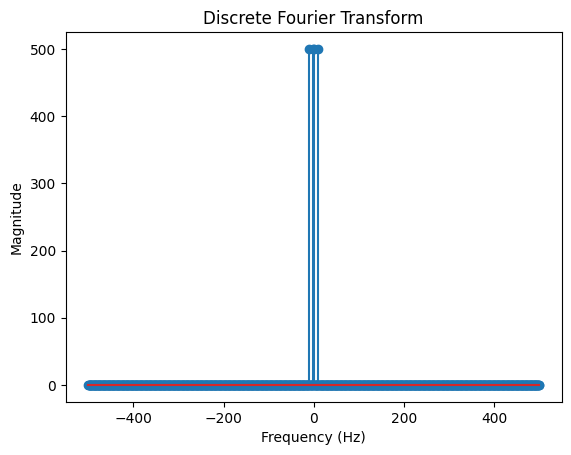

In [ ]:
#fourier tarnsform addition.py
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
fs = 1000  # Sampling frequency
T = 1/fs   # Sampling period
t = np.arange(0, 1, T)  # Time vector

# Define the signal
x = np.sin(2 * np.pi * 10 * t) + np.sin(2 * np.pi * t)

# Perform DFT
N = len(x)
X = np.fft.fft(x)
frequencies = np.fft.fftfreq(N, T)

# Plot the magnitude spectrum
plt.stem(frequencies, np.abs(X))
plt.title('Discrete Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

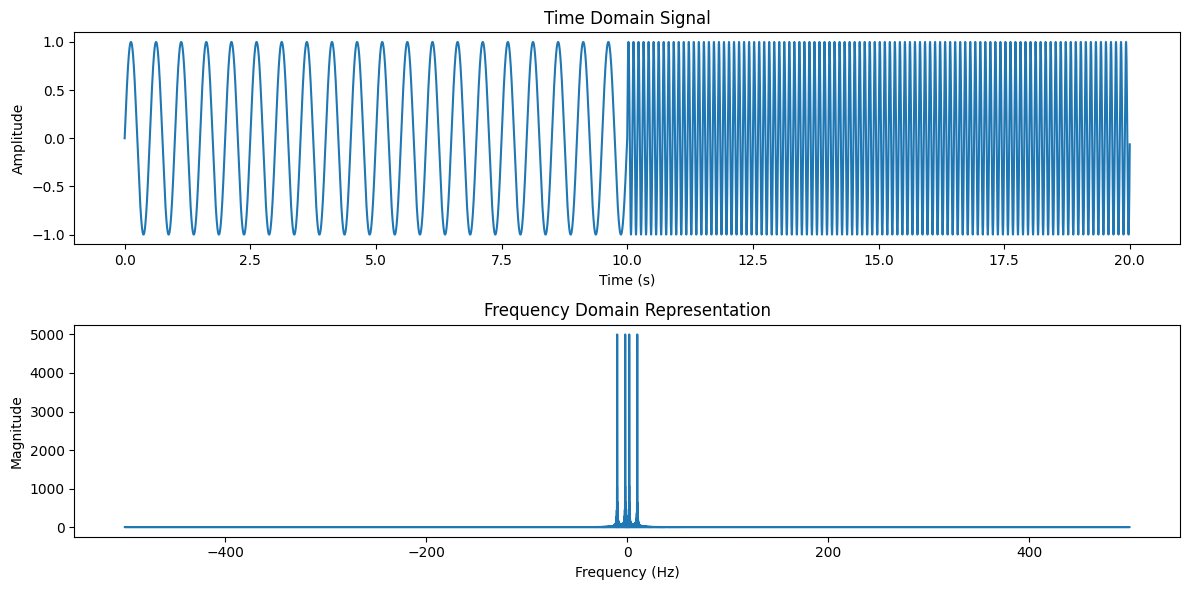

In [ ]:
#fourier transform time.py
import numpy as np
import matplotlib.pyplot as plt

# Parameters
duration = 20  # seconds
sampling_rate = 1000  # samples per second
total_samples = duration * sampling_rate

# Time vector
t = np.linspace(0, duration, total_samples, endpoint=False)

# Signal
x = np.concatenate([np.sin(2 * np.pi * 2 * t[:total_samples // 2]),
                    np.sin(2 * np.pi * 10 * t[total_samples // 2:])])

# Discrete Fourier Transform
X = np.fft.fft(x)
freq = np.fft.fftfreq(total_samples, 1/sampling_rate)

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, x)
plt.title('Time Domain Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(freq, np.abs(X))
plt.title('Frequency Domain Representation')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()


In [ ]:
!pip install tensorflow_decision_forests
# TF-DF requires Tensorflow < 2.15 or tf_keras
!pip install tf_keras


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 39.5 MB/s eta 0:00:00


In [ ]:
!pip install wurlitzer
#Wurlitzer is needed to display the detailed training logs in Colabs (when using verbose=2 in the model constructor).

In [ ]:
import os
# Keep using Keras 2
os.environ['TF_USE_LEGACY_KERAS'] = '1'

import tensorflow_decision_forests as tfdf

import numpy as np
import pandas as pd
import tensorflow as tf
import tf_keras
import math


In [ ]:
# Check the version of TensorFlow Decision Forests
print("Found TensorFlow Decision Forests v" + tfdf.__version__)


Found TensorFlow Decision Forests v1.8.1


In [ ]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label=label)


In [ ]:
# Load a dataset into a Pandas Dataframe.
dataset_df = pd.read_csv("train.csv")

# Display the first 3 examples.
dataset_df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106800 entries, 0 to 106799
Data columns (total 15 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   eeg_id                            106800 non-null  int64  
 1   eeg_sub_id                        106800 non-null  int64  
 2   eeg_label_offset_seconds          106800 non-null  float64
 3   spectrogram_id                    106800 non-null  int64  
 4   spectrogram_sub_id                106800 non-null  int64  
 5   spectrogram_label_offset_seconds  106800 non-null  float64
 6   label_id                          106800 non-null  int64  
 7   patient_id                        106800 non-null  int64  
 8   expert_consensus                  106800 non-null  object 
 9   seizure_vote                      106800 non-null  int64  
 10  lpd_vote                          106800 non-null  int64  
 11  gpd_vote                          106800 non-null  i

In [ ]:
# Encode the categorical labels as integers.
#
# Details:
# This stage is necessary if your classification label is represented as a
# string since Keras expects integer classification labels.
# When using `pd_dataframe_to_tf_dataset` (see below), this step can be skipped.

# Name of the label column.
label = "expert_consensus"

classes = dataset_df[label].unique().tolist()
print(f"Label classes: {classes}")

dataset_df[label] = dataset_df[label].map(classes.index)




Label classes: ['Seizure', 'GPD', 'LRDA', 'Other', 'GRDA', 'LPD']


In [ ]:
# Split the dataset into a training and a testing dataset.

def split_dataset(dataset, test_ratio=0.30):
  """Splits a panda dataframe in two."""
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]


train_ds_pd, test_ds_pd = split_dataset(dataset_df)
print("{} examples in training, {} examples for testing.".format(
    len(train_ds_pd), len(test_ds_pd)))


74693 examples in training, 32107 examples for testing.


In [ ]:


# Specify the model.
model_1 = tfdf.keras.RandomForestModel(verbose=2)

# Train the model.
model_1.fit(train_ds)


Use 2 thread(s) for training
Use /tmp/tmpdou_adqn as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'eeg_id': <tf.Tensor 'data:0' shape=(None,) dtype=int64>, 'eeg_sub_id': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'eeg_label_offset_seconds': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'spectrogram_id': <tf.Tensor 'data_3:0' shape=(None,) dtype=int64>, 'spectrogram_sub_id': <tf.Tensor 'data_4:0' shape=(None,) dtype=int64>, 'spectrogram_label_offset_seconds': <tf.Tensor 'data_5:0' shape=(None,) dtype=float64>, 'label_id': <tf.Tensor 'data_6:0' shape=(None,) dtype=int64>, 'patient_id': <tf.Tensor 'data_7:0' shape=(None,) dtype=int64>, 'seizure_vote': <tf.Tensor 'data_8:0' shape=(None,) dtype=int64>, 'lpd_vote': <tf.Tensor 'data_9:0' shape=(None,) dtype=int64>, 'gpd_vote': <tf.Tensor 'data_10:0' shape=(None,) dtype=int64>, 'lrda_vote': <tf.Tensor 'data_11:0' shape=(None,) dtype=int64>, 'grda_vote': <tf.Tensor 'data_12:0' shape=

[INFO 24-02-07 11:08:15.6265 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-07 11:08:15.6267 UTC kernel.cc:772] Collect training examples
[INFO 24-02-07 11:08:15.6267 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-07 11:08:15.6274 UTC kernel.cc:391] Number of batches: 75
[INFO 24-02-07 11:08:15.6274 UTC kernel.cc:392] Number of examples: 74693
[INFO 24-02-07 11:08:15.6438 UTC kernel.cc:792] Training dataset:
Number of records: 74693
Number of columns: 15

Number of columns by type:
	NUMERICAL: 14 (93.3333%)
	CATEGORICAL: 1 (6.66667%)

Columns:

NUMERICAL: 14 (93.3333%)
	1: "eeg_id" NUMERICAL mean:2.10609e+09 min:568657 ma

Model trained in 0:00:49.104141
Compiling model...
Model compiled.


In [ ]:
model_1.compile(metrics=["accuracy"])
evaluation = model_1.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")


33/33 [==============================] - 10s 56ms/step - loss: 0.0000e+00 - accuracy: 0.9996

loss: 0.0000
accuracy: 0.9996


In [ ]:
#model plotting
tfdf.model_plotter.plot_model_in_colab(model_1, tree_idx=0, max_depth=3)


In [ ]:
model_1.summary()

Model: "random_forest_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (14):
	eeg_id
	eeg_label_offset_seconds
	eeg_sub_id
	gpd_vote
	grda_vote
	label_id
	lpd_vote
	lrda_vote
	other_vote
	patient_id
	seizure_vote
	spectrogram_id
	spectrogram_label_offset_seconds
	spectrogram_sub_id

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.                        "grda_vote"  0.244138 ################
    2.                     "seizure_vote"  0.227898 ##############
    3.                        "lrda_vote"  0.221038 #############
    4.                         "gpd_vote"  0.195444 ###########
    5.                         "lpd_vote"  0.185968 ##########
    6.

In [ ]:
# The feature importances
model_1.make_inspector().variable_importances()


{'SUM_SCORE': [("seizure_vote" (1; #11), 7322521.613370459),
  ("grda_vote" (1; #5), 6753288.609023525),
  ("gpd_vote" (1; #4), 6630842.192773391),
  ("lrda_vote" (1; #8), 6054592.497577022),
  ("other_vote" (1; #9), 5422264.613373123),
  ("lpd_vote" (1; #7), 5392038.970889334),
  ("eeg_sub_id" (1; #3), 891606.2841829224),
  ("spectrogram_sub_id" (1; #14), 433278.4964756537),
  ("eeg_label_offset_seconds" (1; #2), 233855.5700063437),
  ("patient_id" (1; #10), 219184.80118271284),
  ("spectrogram_label_offset_seconds" (1; #13), 167561.52121604045),
  ("spectrogram_id" (1; #12), 149985.42513693197),
  ("eeg_id" (1; #1), 136197.38343316538),
  ("label_id" (1; #6), 20490.880815338867)],
 'NUM_AS_ROOT': [("seizure_vote" (1; #11), 107.0),
  ("grda_vote" (1; #5), 74.0),
  ("lrda_vote" (1; #8), 54.0),
  ("gpd_vote" (1; #4), 32.0),
  ("lpd_vote" (1; #7), 18.0),
  ("other_vote" (1; #9), 8.0),
  ("eeg_sub_id" (1; #3), 5.0),
  ("spectrogram_sub_id" (1; #14), 2.0)],
 'INV_MEAN_MIN_DEPTH': [("grda_v

In [ ]:
model_1.make_inspector().evaluation()


Evaluation(num_examples=74693, accuracy=0.9993305932282811, loss=0.011906483752056676, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)